In [1]:
from google.colab import drive
drive.mount('/content/drive') #, force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import subprocess

In [3]:
drive_folder = "/content/drive/MyDrive/trabajo_final_CEIA/train_models"
weights_dir = "/content/drive/MyDrive/trabajo_final_CEIA/train_models/weights_and_results/weights"
results_dir = "/content/drive/MyDrive/trabajo_final_CEIA/train_models/weights_and_results"
eval_results_dir = "/content/drive/MyDrive/trabajo_final_CEIA/train_models/weights_and_results/eval_results"

In [ ]:
# Download YOLOv8
!pip install ultralytics

from IPython import display
display.clear_output()

from ultralytics import YOLO
print('YOLOv8 setup complete.')

YOLOv8 setup complete.


In [ ]:
# Download YOLOv7
%cd {results_dir}
# !git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

from IPython import display
display.clear_output()
print('YOLOv7 setup complete.')

YOLOv7 setup complete.


In [ ]:
# Download YOLOv5
%cd {results_dir}
# !git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython import display
display.clear_output()
print('YOLOv5 setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

YOLOv5 setup complete. Using torch 2.0.1+cu118 CPU


In [ ]:
%cd {results_dir}
!ls

/content/drive/MyDrive/trabajo_final_CEIA/train_models/weights_and_results
eval_results  get_val_metrics.ipynb  weights


In [ ]:
# Iterate over the folders in the directory
%cd {weights_dir}
output_file = "output.txt"
for folder_name in os.listdir(weights_dir):
    if not folder_name.startswith("model"):
        continue

    folder_path = os.path.join(weights_dir, folder_name, "weights")

    # Split the folder name into variables
    variables = folder_name.split('_')

    # Extract the required variables
    model = variables[1]
    tf = variables[3]
    imgsz = variables[5]
    epochs = variables[7]
    batch = variables[9]

    print(folder_name)
    print("Model:", model)
    print("TF:", tf)
    print("Imgsz:", imgsz)
    print("Epochs:", epochs)
    print("Batch:", batch)
    print("Executing command...")
    dataset_location = drive_folder + "/datasets/" + model
    command = None

    if model == "yolov5":
        %cd {results_dir}/yolov5
        best_pt_path = os.path.join(folder_path, "best.pt")
        command = f"python val.py --weights {best_pt_path} --data {dataset_location}/data.yaml --task val --name {folder_name}"
        print(command)

    elif model == "yolov7":
        %cd {results_dir}/yolov7
        best_pt_path = os.path.join(folder_path, "best.pt")
        command = f"python test.py --weights {best_pt_path} --data {dataset_location}/data.yaml --task test --name {folder_name}"
        print(command)

    elif model == "yolov8":
        %cd {results_dir}
        best_pt_path = os.path.join(folder_path, "best.pt")
        command = f"yolo val model={best_pt_path} data={dataset_location}/data.yaml split=test name={folder_name}"
        print(command)

    if command:
        # Run the command using subprocess.Popen and capture the output
        with subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True) as process:
            # Open the output file for writing
            with open(f"{eval_results_dir}/{output_file}", "a") as file:
                file.write(folder_name)
                # Read and display each line of the output as it becomes available
                for line in process.stdout:
                    print(line, end="")
                    file.write(line)

    from IPython import display
    display.clear_output()

    print("Executing command...", "DONE!")
    print()

In [ ]:
# Iterate over the folders in the directory
output_file = "output_big.txt"
%cd {weights_dir}
for folder_name in os.listdir(weights_dir):
    if not folder_name.startswith("model"):
        continue

    folder_path = os.path.join(weights_dir, folder_name, "weights")

    # Split the folder name into variables
    variables = folder_name.split('_')

    # Extract the required variables
    model = variables[1]
    tf = variables[3]
    imgsz = variables[5]
    epochs = variables[7]
    batch = variables[9]

    print(folder_name)
    print("Model:", model)
    print("TF:", tf)
    print("Imgsz:", imgsz)
    print("Epochs:", epochs)
    print("Batch:", batch)
    print("Executing command...")
    dataset_location = drive_folder + "/datasets/" + model + "_big"
    command = None

    if model == "yolov55":
        %cd {results_dir}/yolov5
        best_pt_path = os.path.join(folder_path, "best.pt")
        command = f"python val.py --weights {best_pt_path} --data {dataset_location}/data.yaml --task val --name {folder_name}_big"
        print(command)

    elif model == "yolov77":
        %cd {results_dir}/yolov7
        best_pt_path = os.path.join(folder_path, "best.pt")
        command = f"python test.py --weights {best_pt_path} --data {dataset_location}/data.yaml --task test --name {folder_name}_big"
        print(command)

    elif model == "yolov88":
        %cd {results_dir}
        best_pt_path = os.path.join(folder_path, "best.pt")
        command = f"yolo val model={best_pt_path} data={dataset_location}/data.yaml split=test name={folder_name}_big"
        print(command)

    elif folder_name in ["model_yolov8_tf_yolov8s_imgsz_800_epochs_100_batch_16", "model_yolov8_tf_no_imgsz_800_epochs_100_batch_16"]:
        %cd {results_dir}
        best_pt_path = os.path.join(folder_path, "best.pt")
        command = f"yolo val model={best_pt_path} data={dataset_location}/data.yaml split=test name={folder_name}_big"
        print(command)

    if command:
        # Run the command using subprocess.Popen and capture the output
        with subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True) as process:
            # Open the output file for writing
            with open(f"{eval_results_dir}/{output_file}", "a") as file:
                file.write(folder_name)
                # Read and display each line of the output as it becomes available
                for line in process.stdout:
                    print(line, end="")
                    file.write(line)

    from IPython import display
    display.clear_output()

    print("Executing command...", "DONE!")
    print()

Executing command... DONE!



In [6]:
def process_file(file_path):
    big_flag = "big_" if "big" in file_path else ""
    results = list()
    curr_res = dict()

    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        if "saved" in line or "all" in line or "knife" in line or "pistol" in line:
            if line.strip(" ").startswith("all"):
                P, R, mAP5, mAP95 = line.split()[3:]
                curr_res[big_flag + "all_P"] = P
                curr_res[big_flag + "all_R"] = R
                curr_res[big_flag + "all_F1"] = (float(P) * float(R)) / (float(P) + float(R))
                curr_res[big_flag + "all_mAP@.5"] = mAP5
                curr_res[big_flag + "all_mAP@.5:.95"] = mAP95

            elif line.strip(" ").startswith("knife"):
                P, R, mAP5, mAP95 = line.split()[3:]
                curr_res[big_flag + "knife_P"] = P
                curr_res[big_flag + "knife_R"] = R
                curr_res[big_flag + "knife_F1"] = (float(P) * float(R)) / (float(P) + float(R))
                curr_res[big_flag + "knife_mAP@.5"] = mAP5
                curr_res[big_flag + "knife_mAP@.5:.95"] = mAP95

            elif line.strip(" ").startswith("pistol"):
                P, R, mAP5, mAP95 = line.split()[3:]
                curr_res[big_flag + "pistol_P"] = P
                curr_res[big_flag + "pistol_R"] = R
                curr_res[big_flag + "pistol_F1"] = (float(P) * float(R)) / (float(P) + float(R))
                curr_res[big_flag + "pistol_mAP@.5"] = mAP5
                curr_res[big_flag + "pistol_mAP@.5:.95"] = mAP95

            elif line.strip(" ").startswith("Results saved to"):
                model_key = line.split("/")[-1].replace('\x1b[0m', '').replace('\n', '')
                model_info = model_key.split("_")

                if not big_flag:
                    curr_res["model"] = model_info[1]
                    curr_res["tf"] = model_info[3]
                    curr_res["imgsz"] = model_info[5]
                    curr_res["epochs"] = model_info[7]
                    curr_res["batch"] = model_info[9]

                if model_key.endswith("2"):
                    model_key = model_key[:-1]
                if model_key.endswith("_big"):
                    model_key = model_key[:-4]
                curr_res["model_key"] = model_key

                results.append(curr_res)
                curr_res = dict()

    df = pd.DataFrame(results)
    df.set_index('model_key', inplace=True)
    return df, big_flag

def process_directory(directory_path):
    df_list = list()
    big_df_list = list()
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                df, big_flag = process_file(file_path)
                if big_flag != "":
                    big_df_list.append(df)
                else:
                    df_list.append(df)

    result_df = pd.concat(df_list)
    big_result_df = pd.concat(big_df_list)
    temp = pd.merge(result_df, big_result_df, left_index=True, right_index=True)

    # Check for duplicate indexes
    duplicate_indexes = temp.index.duplicated()

    # Filter out rows with duplicate indexes
    unique_df = temp[~duplicate_indexes]
    return unique_df

df = process_directory(eval_results_dir)
df.to_csv(f'{results_dir}/output_file.csv')
df

,all_P,all_R,all_F1,all_mAP@.5,all_mAP@.5:.95,knife_P,knife_R,knife_F1,knife_mAP@.5,knife_mAP@.5:.95,...,big_knife_P,big_knife_R,big_knife_F1,big_knife_mAP@.5,big_knife_mAP@.5:.95,big_pistol_P,big_pistol_R,big_pistol_F1,big_pistol_mAP@.5,big_pistol_mAP@.5:.95
model_key,,,,,,,,,,,,,,,,,,,,,
model_yolov5_tf_no_imgsz_800_epochs_100_batch_16,0.828,0.737,0.389927,0.8,0.467,0.881,0.824,0.425774,0.891,0.547,...,0.013,0.0148,0.006921,0.00607,0.00218,0.0281,0.0469,0.017572,0.0112,0.00459
model_yolov5_tf_yolov5s_imgsz_640_epochs_100_batch_16,0.844,0.822,0.416427,0.857,0.522,0.903,0.875,0.444390,0.922,0.59,...,0.0217,0.025,0.011617,0.00929,0.00356,0.0315,0.0588,0.020512,0.0139,0.00598
model_yolov5_tf_yolov5s_imgsz_800_epochs_100_batch_16,0.852,0.796,0.411524,0.831,0.517,0.913,0.869,0.445228,0.908,0.581,...,0.0133,0.148,0.012203,0.00776,0.00306,0.0195,0.411,0.018617,0.0151,0.00691
model_yolov7_tf_yolov7training_imgsz_640_epochs_100_batch_16,0.874,0.849,0.430659,0.881,0.624,0.934,0.924,0.464487,0.955,0.666,...,0.853,0.625,0.360707,0.692,0.386,0.443,0.331,0.189448,0.23,0.119
model_yolov7_tf_yolov7training_imgsz_800_epochs_100_batch_8,0.856,0.808,0.415654,0.858,0.584,0.913,0.883,0.448875,0.939,0.633,...,0.866,0.603,0.355479,0.672,0.362,0.378,0.324,0.174462,0.214,0.099
model_yolov8_tf_no_imgsz_800_epochs_100_batch_16,0.871,0.776,0.410380,0.846,0.599,0.92,0.861,0.444761,0.925,0.657,...,0.813,0.631,0.355265,0.696,0.397,0.435,0.286,0.172552,0.221,0.113
model_yolov8_tf_yolov8l_imgsz_800_epochs_100_batch_16,0.867,0.758,0.404422,0.838,0.597,0.916,0.861,0.443824,0.919,0.655,...,0.807,0.625,0.352217,0.693,0.431,0.409,0.3,0.173061,0.227,0.114
model_yolov8_tf_yolov8s_imgsz_640_epochs_100_batch_16,0.888,0.777,0.414400,0.86,0.623,0.927,0.833,0.438745,0.927,0.661,...,0.864,0.609,0.357214,0.706,0.446,0.463,0.254,0.164020,0.237,0.128
model_yolov8_tf_yolov8s_imgsz_800_epochs_100_batch_16,0.877,0.756,0.406009,0.844,0.612,0.914,0.849,0.440151,0.928,0.675,...,0.831,0.623,0.356061,0.691,0.433,0.463,0.299,0.181676,0.243,0.127


In [7]:
from IPython.display import display, Image

In [10]:
!ls {eval_results_dir}/model_yolov7_tf_yolov7training_imgsz_640_epochs_100_batch_16

confusion_matrix.png  R_curve.png	      test_batch1_pred.jpg
F1_curve.png	      test_batch0_labels.jpg  test_batch2_labels.jpg
P_curve.png	      test_batch0_pred.jpg    test_batch2_pred.jpg
PR_curve.png	      test_batch1_labels.jpg


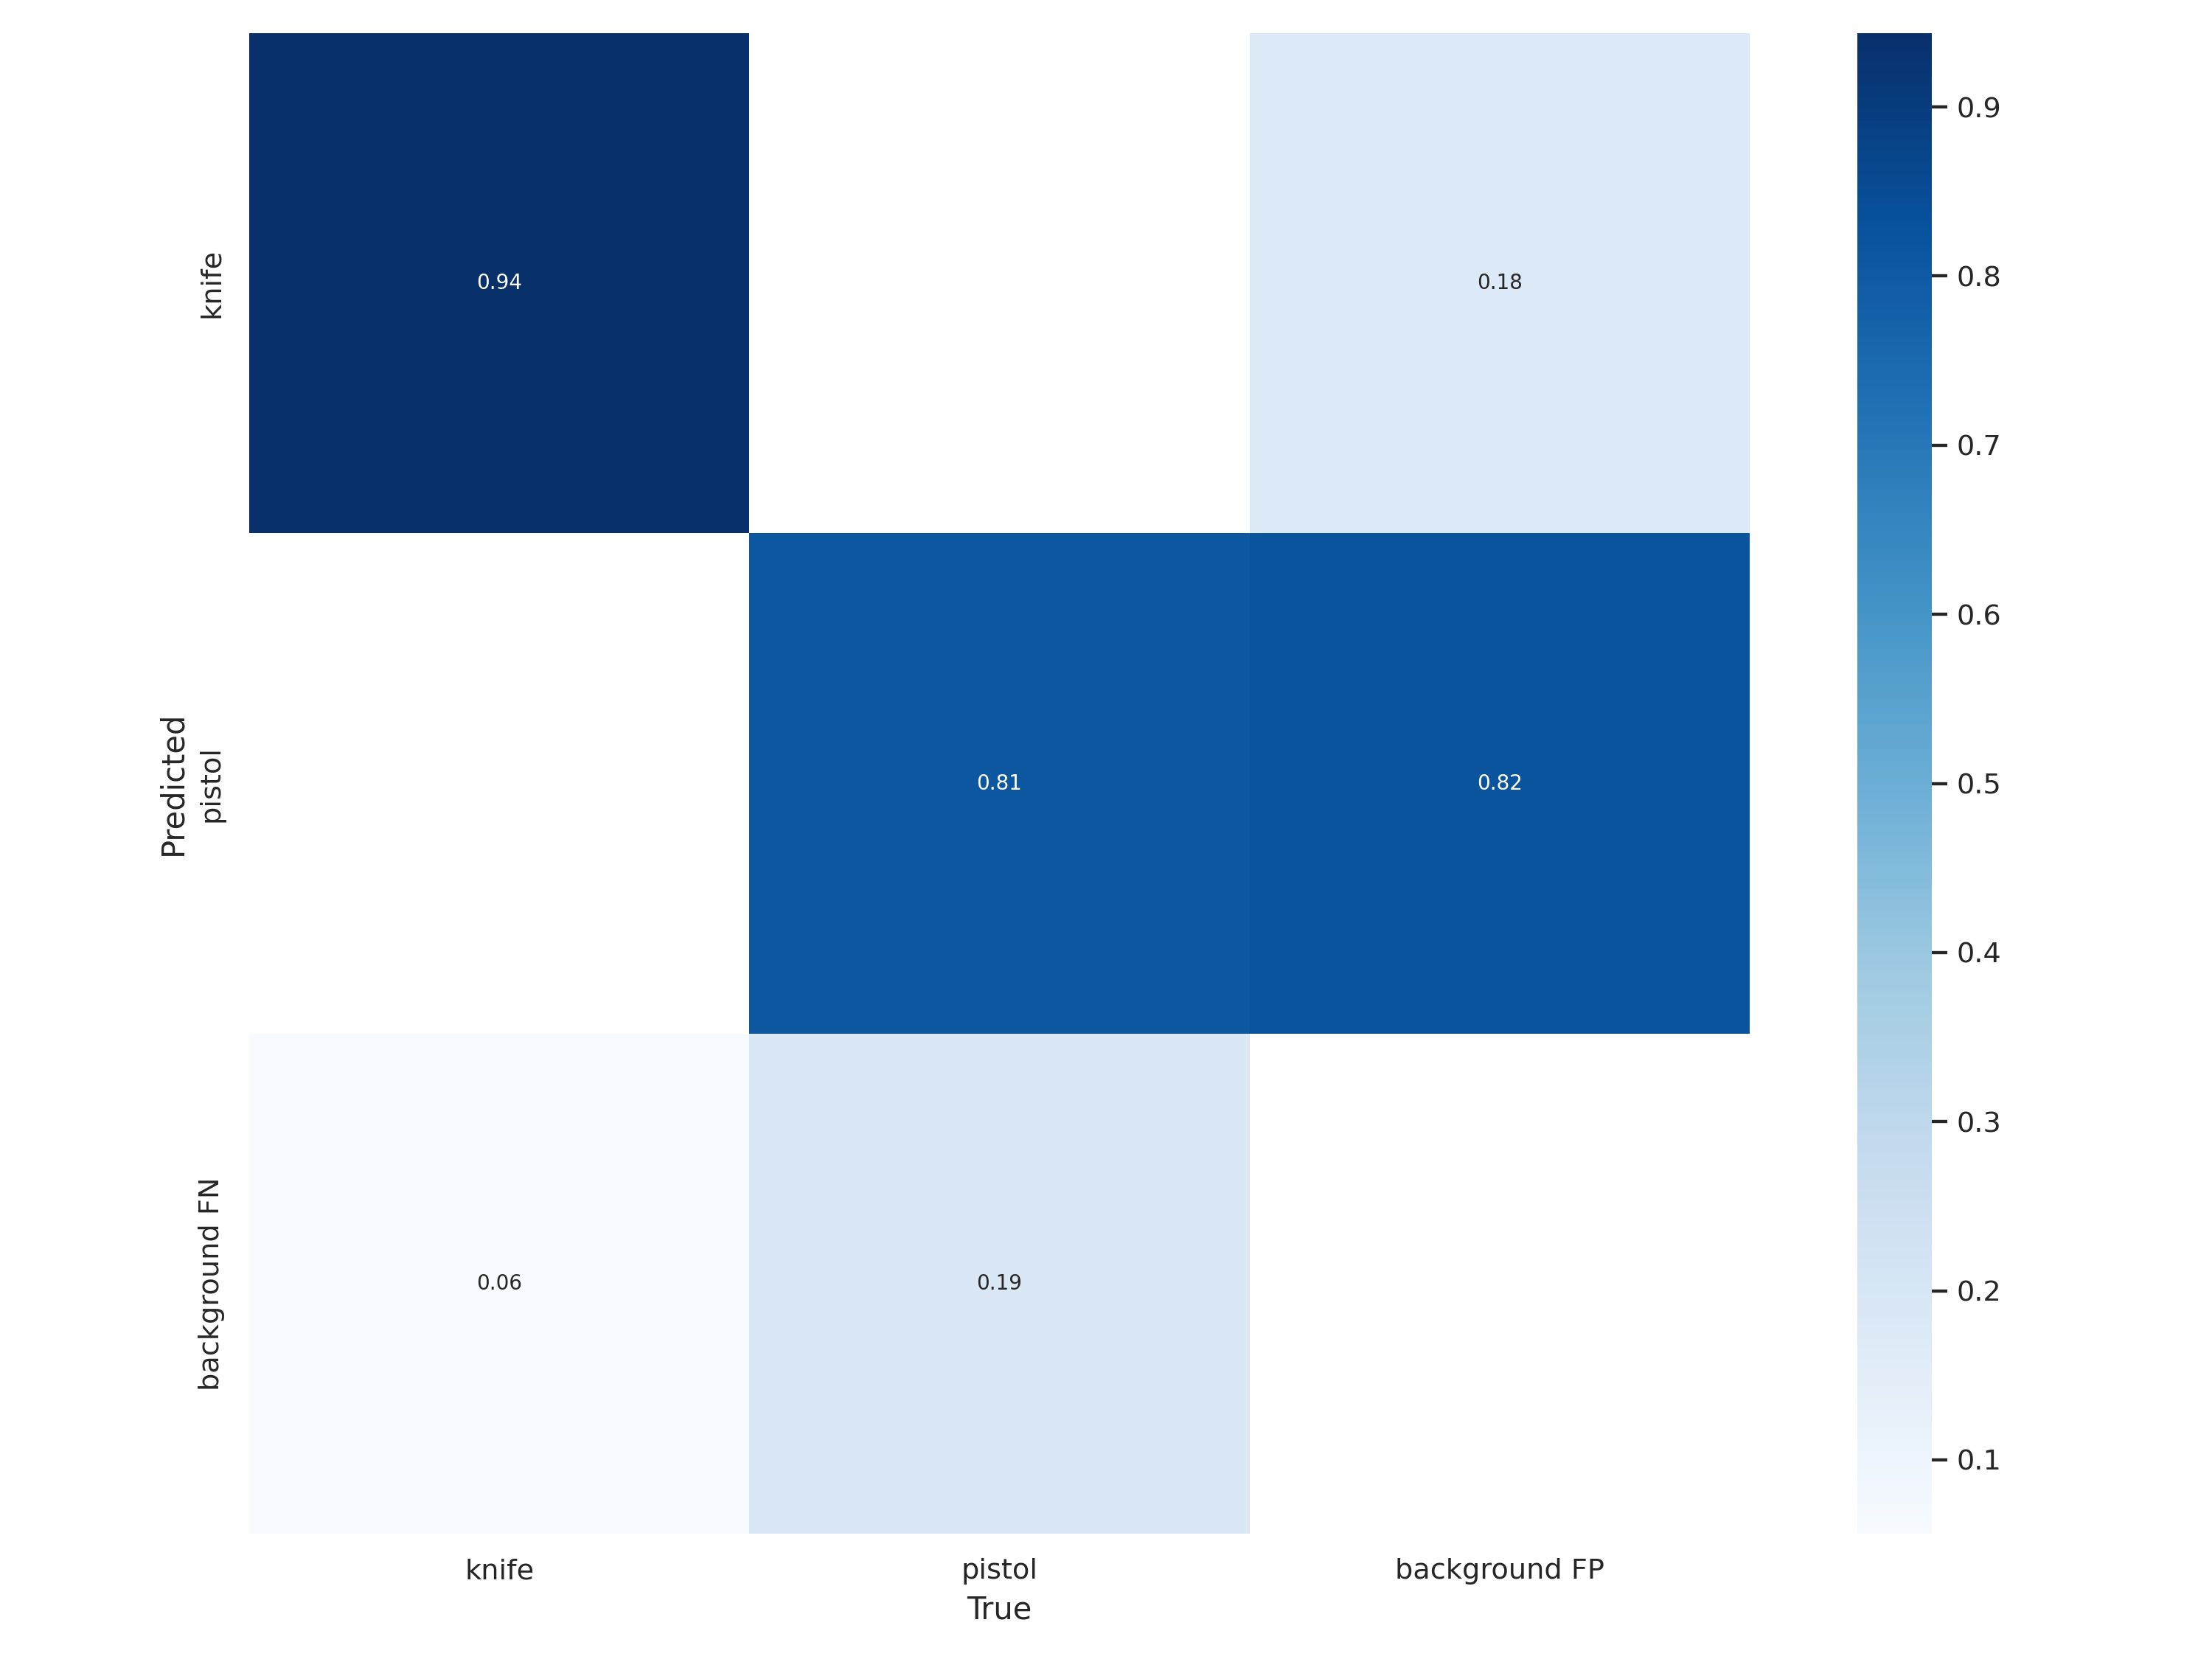

In [16]:
Image(filename=f'{eval_results_dir}/model_yolov7_tf_yolov7training_imgsz_640_epochs_100_batch_16/confusion_matrix.png', height=600)

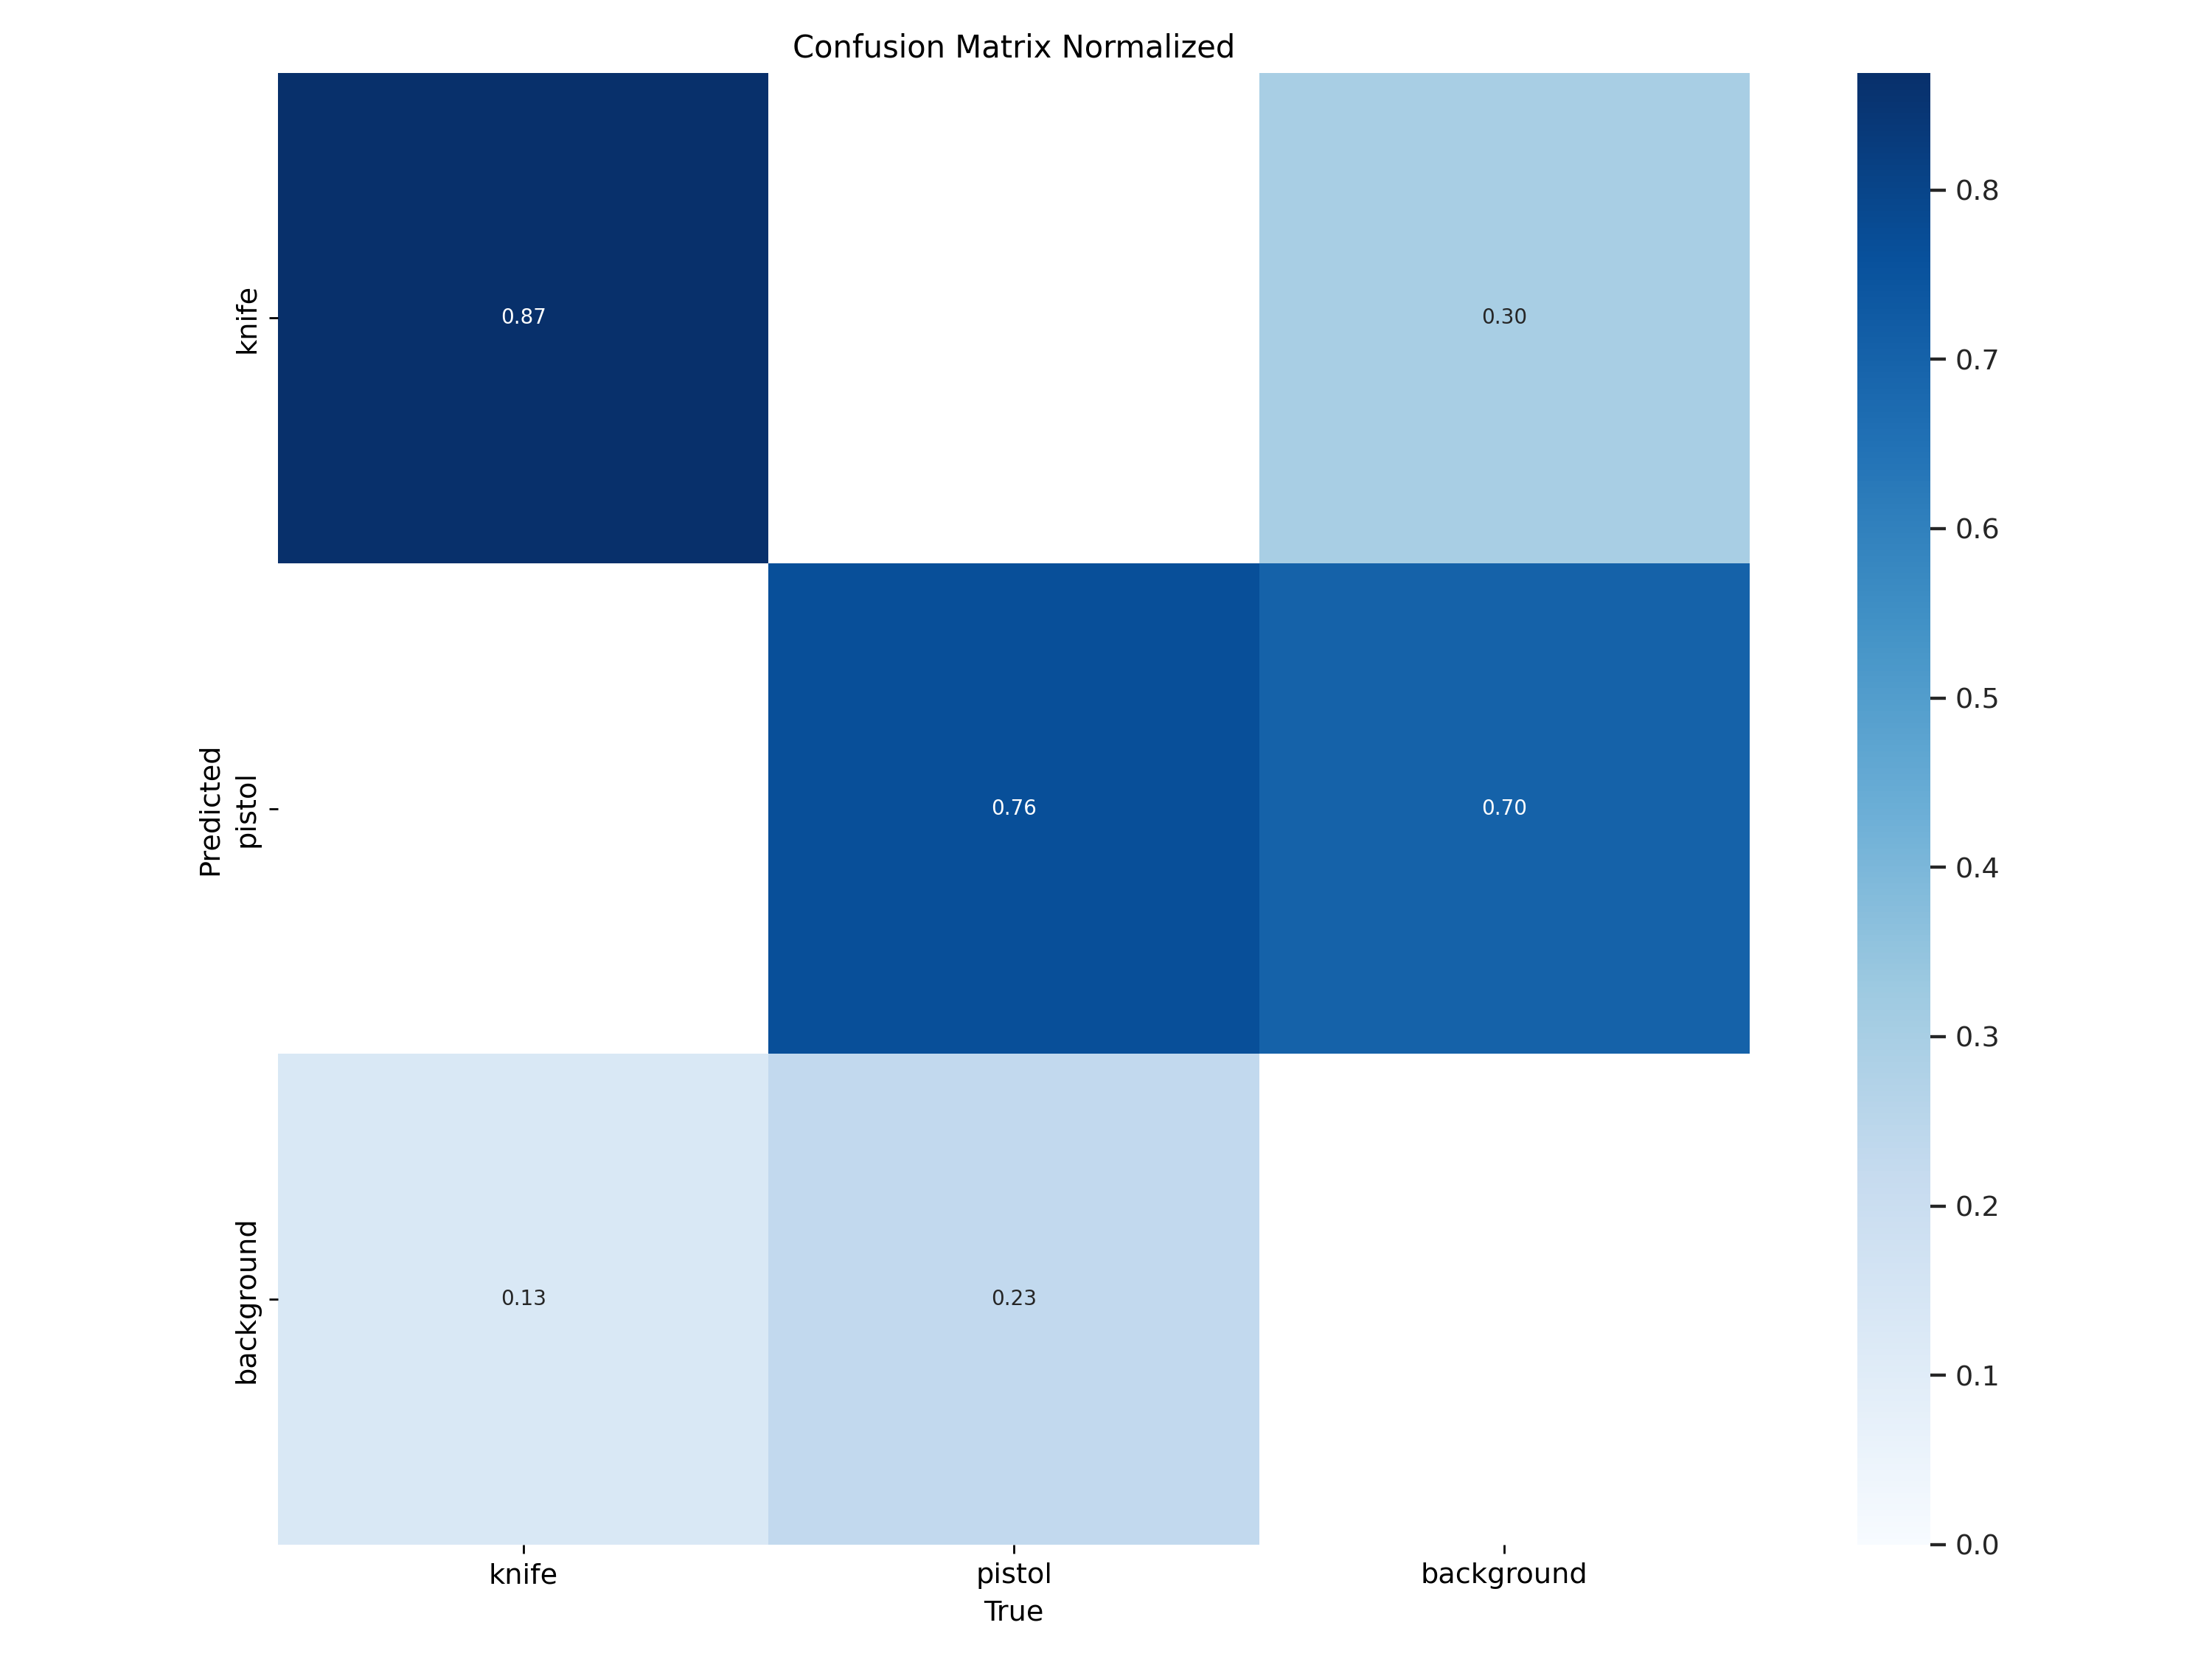

In [18]:
Image(filename=f'{eval_results_dir}/model_yolov8_tf_yolov8s_imgsz_640_epochs_100_batch_16/confusion_matrix_normalized.png', height=600)